In [8]:
%load_ext autoreload
%autoreload 2

import json
import task3
import logging
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path
from tqdm.auto import tqdm
from skopt import gp_minimize
from typing import Dict, Tuple
from skopt.space import Integer, Real
from skopt.utils import use_named_args
from skopt.callbacks import Callable
from task3 import ImageDataset, ObjectDetector, Verbosity

QUERY_IMG_DIR = Path("IconDataset", "png")
TEST_IMG_DIR = Path("Task3Dataset", "today")

ANNOTATIONS_DIR = Path("Task3Dataset", "annotations")

# Configure basic logging
logging.basicConfig(level=logging.INFO, format='[%(asctime)s]::[%(levelname)s] %(message)s')
logger = logging.getLogger(__name__)

test_images = ImageDataset(TEST_IMG_DIR, file_ext="png")
query_images = ImageDataset(QUERY_IMG_DIR, file_ext="png")

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### Impact of Lowe Ratio Test Threshold on Performance Metrics

In [10]:
results = {}
lowe_threshold_space = [i/100 for i in range(5, 105, 5)]

for lowe_threshold in lowe_threshold_space:
    results[lowe_threshold] = task3.detect_on_dataset(test_images, query_images, ANNOTATIONS_DIR, lowe_threshold=lowe_threshold)

with open("results/varying_lowe_threshold.json", 'w') as f:
    json.dump(results, f, indent=4)

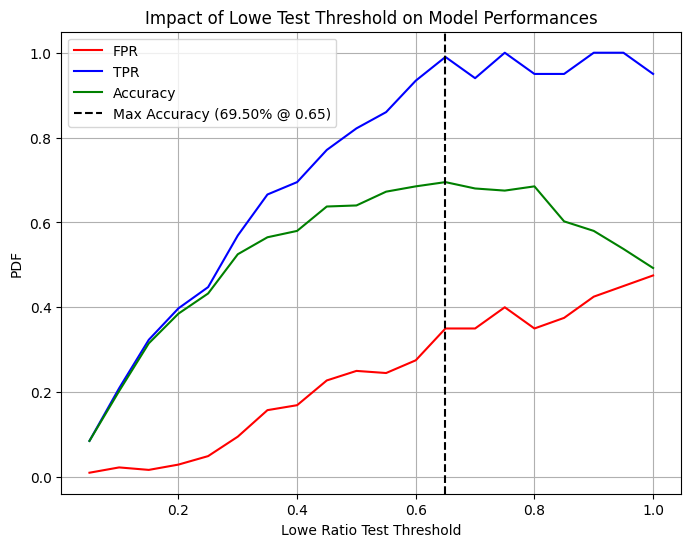

In [29]:
ratios = list(results.keys())
acc = [x[0] for x in results.values()]
tpr = [x[1] for x in results.values()]
fpr = [x[2] for x in results.values()]

max_accuracy = max(acc)
max_ratio = ratios[acc.index(max_accuracy)]

plt.figure(figsize=(8,6))

plt.plot(ratios, fpr, label='FPR', color='red')
plt.plot(ratios, tpr, label='TPR', color='blue')
plt.plot(ratios, acc, label='Accuracy', color='green')
plt.axvline(x=max_ratio, color='black', linestyle='--', label=f'Max Accuracy ({(max_accuracy*100):.2f}% @ {max_ratio:.2f})')

plt.title('Impact of Lowe Test Threshold on Model Performances')
plt.xlabel('Lowe Ratio Test Threshold')
plt.ylabel('PDF')
plt.legend()
plt.grid(True)
plt.savefig(fname='plots/varying_lowe_threshold.png')
plt.show()

### Illustrate matchings between an icon and a test image

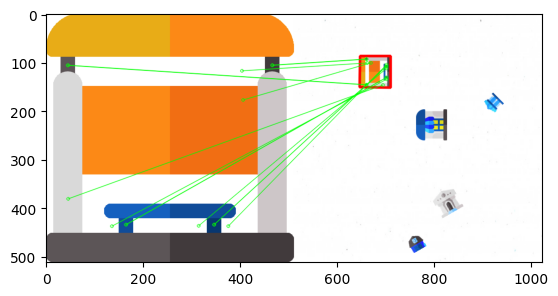

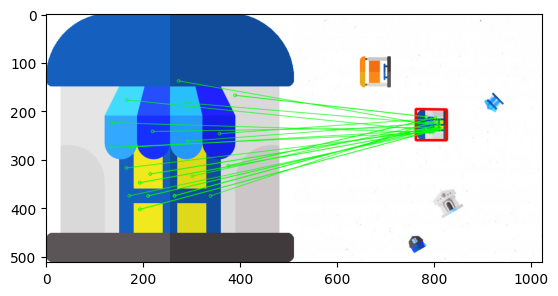

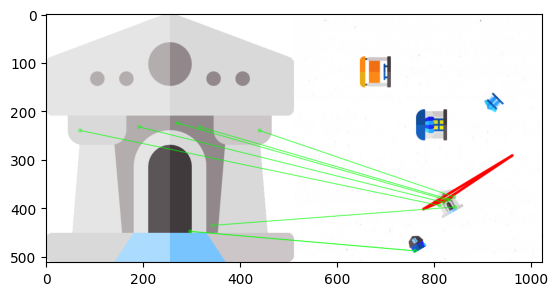

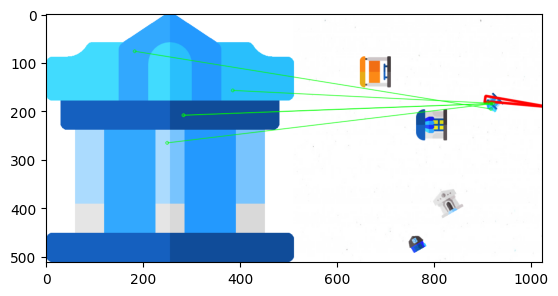

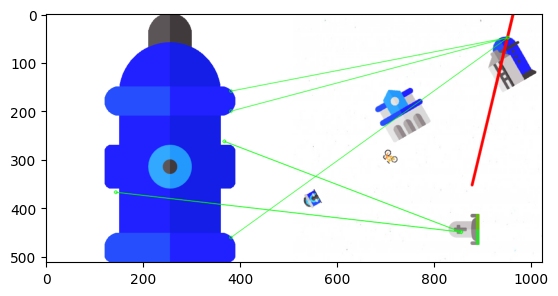

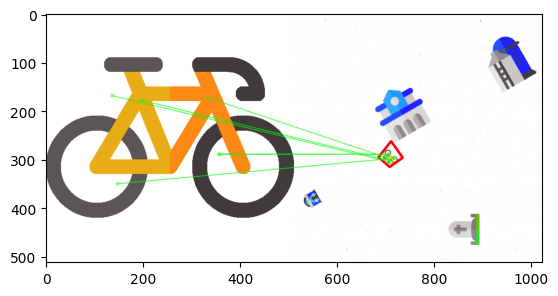

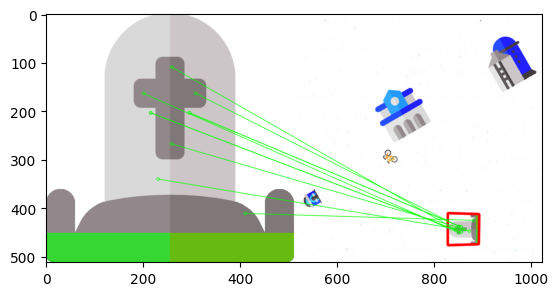

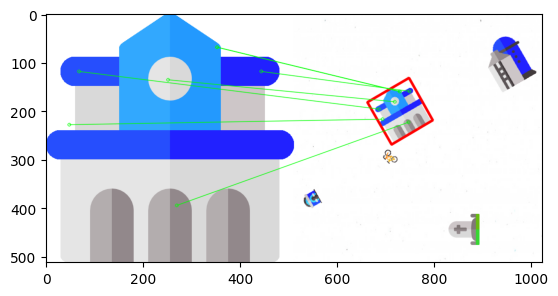

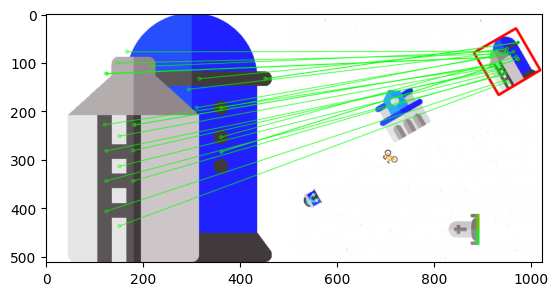

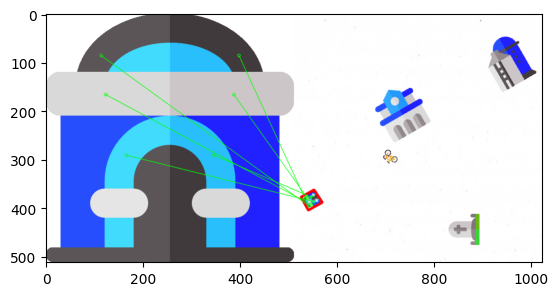

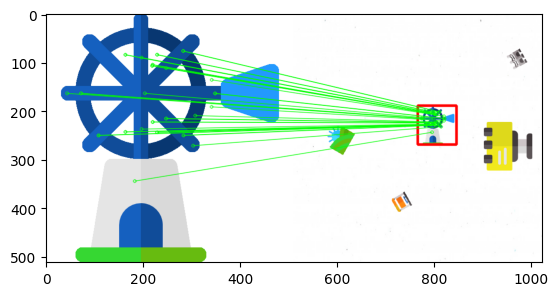

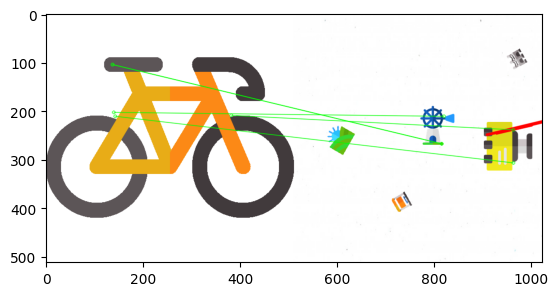

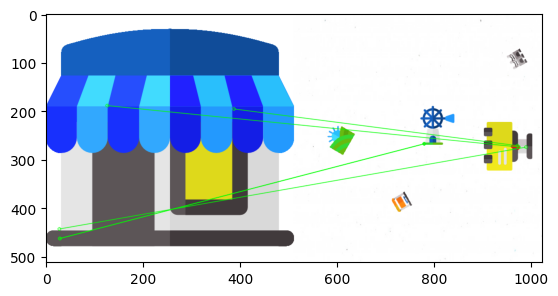

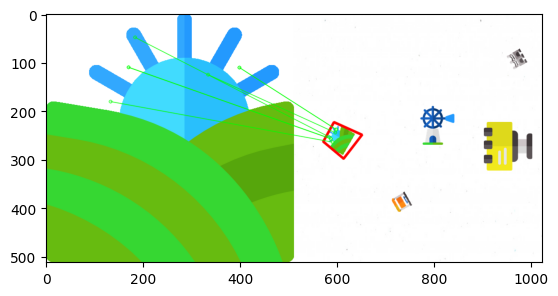

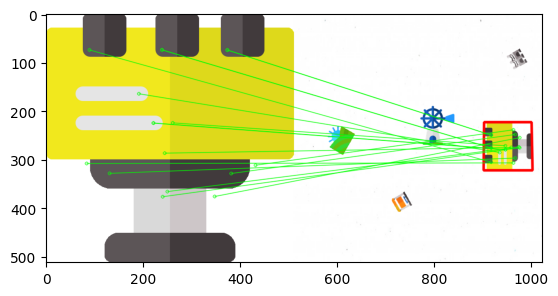

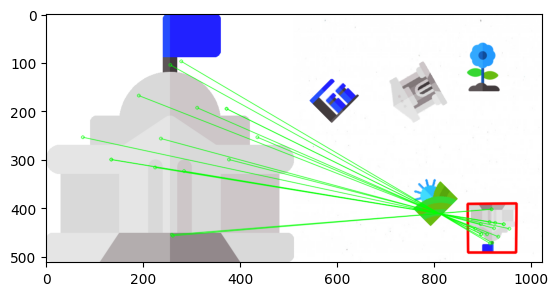

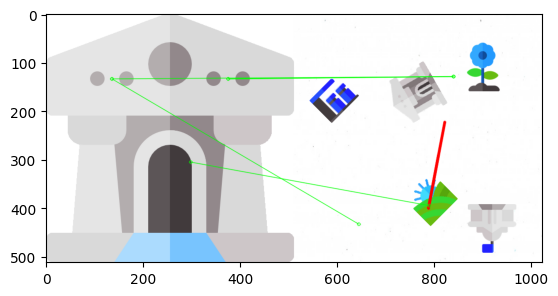

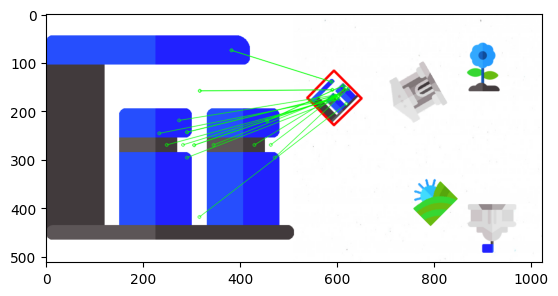

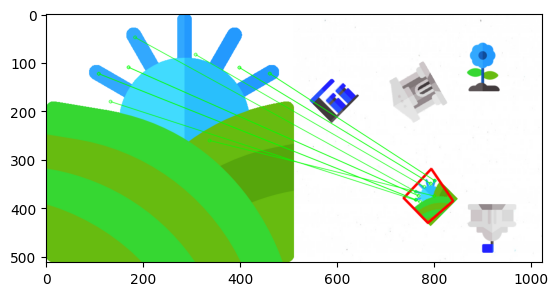

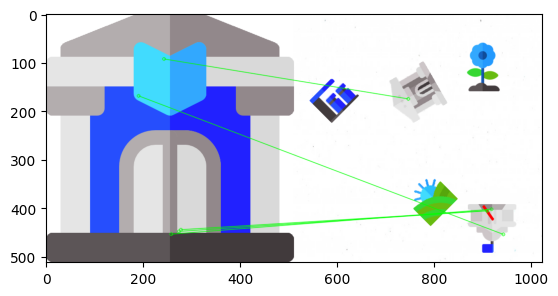

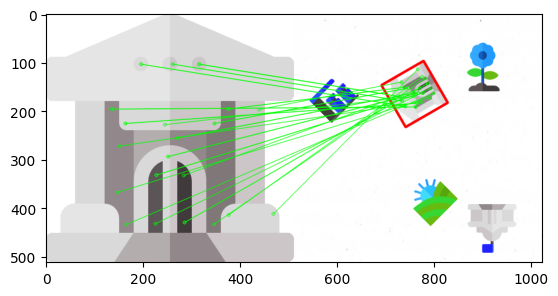

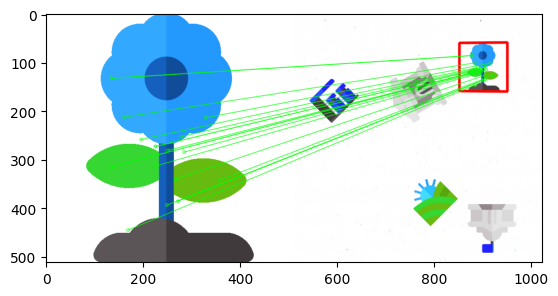

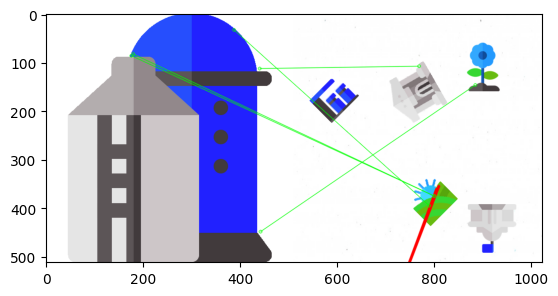

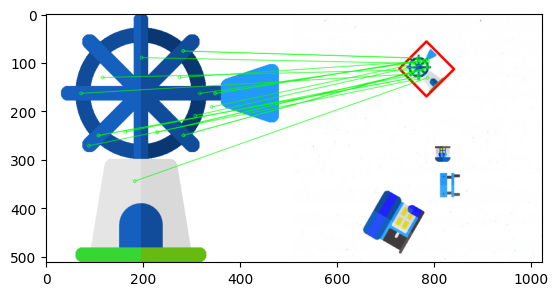

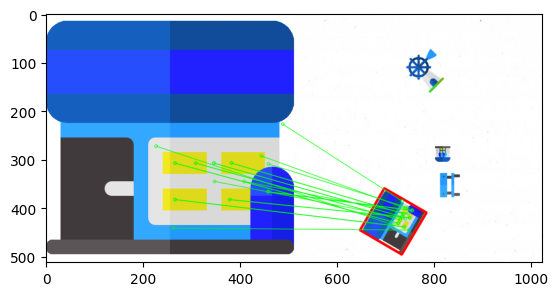

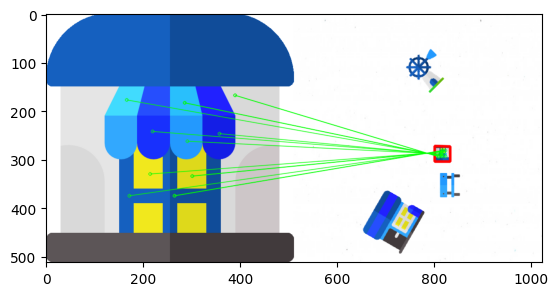

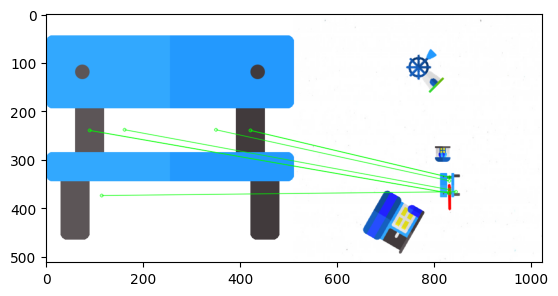

In [9]:
params = {"sift_n_features": 0,
 "sift_n_octave_layers": 3, 
 "sift_contrast_threshold": 0.005, 
 "sift_edge_threshold": 11.777774652601527, 
 "sift_sigma": 1.8071337661481155, 
 "ransac_reproj_threshold": 1.0, 
 "ransac_min_datapoints": 4, 
 "ransac_inliers_threshold": 0, 
 "ransac_confidence": 0.9, 
 "lowe_threshold": 0.5, 
 "min_match_count": 4}

sift_hps = {
        'nfeatures': params['sift_n_features'],
        'nOctaveLayers': params['sift_n_octave_layers'],
        'contrastThreshold': params['sift_contrast_threshold'],
        'edgeThreshold': params['sift_edge_threshold'],
        'sigma': params['sift_sigma'],
    }

ransac_hps = {
    'inliers_threshold': params['ransac_inliers_threshold'],
    'min_datapoints': params['ransac_min_datapoints'],
    'reproj_threshold': params['ransac_reproj_threshold'],
    'confidence': params['ransac_confidence']
}

lowe_ratio = params['lowe_threshold']
min_match_count = params['min_match_count']

metrics = task3.detect_on_dataset(test_images, query_images, ANNOTATIONS_DIR, sift_hps, ransac_hps, lowe_ratio, min_match_count, verbose=True, draw=True)

In [6]:
metrics

(0.6725000000000001, 0.7066666666666667, 0.075, 0.29333333333333333)

In [9]:
metrics

(0.805, 0.8416666666666666, 0.07916666666666666, 0.15833333333333333)

In [3]:
metrics

(0.795, 0.8375, 0.08249999999999999, 0.1625)

In [5]:
metrics

(0.8150000000000001, 0.945, 0.19166666666666665, 0.05500000000000001)